In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# read_tables
original = pd.read_csv('results_table.csv', index_col=0)

In [22]:
original = original[(original["dataset"].str.contains("Heart"))]
original['type'] = 'full reference'

In [23]:
no_draw = pd.read_csv('results_table_no_draw.csv', index_col=0)
no_draw['type'] = 'no draw'
draw = pd.read_csv("results_table_draw.csv", index_col=0)
draw['type'] = draw['power']

In [24]:
df = pd.concat([original, no_draw, draw])

In [25]:
df

,path,method,modality,dataset_features,dataset,features,mdata_spatial_path,jsd,rmse,type,power
1,/vol/storage/data/deconvolution_results/tangra...,tangram,atac,Heart_3_highly_accessible,Heart_3,highly_accessible,/vol/storage/data/simulations/Heart_3.h5mu,0.641672,0.140651,full reference,NaN
8,/vol/storage/data/deconvolution_results/tangra...,tangram,atac,Heart_1_highly_accessible,Heart_1,highly_accessible,/vol/storage/data/simulations/Heart_1.h5mu,0.926100,0.229473,full reference,NaN
10,/vol/storage/data/deconvolution_results/tangra...,tangram,atac,Heart_4_highly_variable,Heart_4,highly_variable,/vol/storage/data/simulations/Heart_4.h5mu,0.757154,0.180237,full reference,NaN
11,/vol/storage/data/deconvolution_results/tangra...,tangram,atac,Heart_2_highly_accessible,Heart_2,highly_accessible,/vol/storage/data/simulations/Heart_2.h5mu,0.603186,0.119302,full reference,NaN
12,/vol/storage/data/deconvolution_results/tangra...,tangram,atac,Heart_3_highly_variable,Heart_3,highly_variable,/vol/storage/data/simulations/Heart_3.h5mu,0.628832,0.139311,full reference,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7,/vol/storage/data/deconvolution_results/test2/...,tangram,atac,Heart_1_highly_variable,Heart_1,highly_variable,/vol/storage/data/simulations/test/Heart_1.h5mu,0.832788,0.203817,power3,power3
0,/vol/storage/data/deconvolution_results/test2/...,tangram,rna,Heart_4_highly_variable,Heart_4,highly_variable,/vol/storage/data/simulations/test/Heart_4.h5mu,0.688794,0.161256,power3,power3
1,/vol/storage/data/deconvolution_results/test2/...,tangram,rna,Heart_3_highly_variable,Heart_3,highly_variable,/vol/storage/data/simulations/test/Heart_3.h5mu,0.576585,0.127820,power3,power3
2,/vol/storage/data/deconvolution_results/test2/...,tangram,rna,Heart_2_highly_variable,Heart_2,highly_variable,/vol/storage/data/simulations/test/Heart_2.h5mu,0.561146,0.110404,power3,power3


In [26]:
df['jsd_rmse'] = df[['jsd', 'rmse']].mean(axis=1)    

In [27]:
test = df.query("modality == 'atac'")

In [29]:
test.type = pd.Categorical(
    test.type,
    categories=[
        "no draw",
        "power0",
        "power1",
        "power2",
        "power3",
        "full reference",
    ],
)

/tmp/ipykernel_373661/3493505105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.type = pd.Categorical(


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_373661/2141626727.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test.groupby(["type", "method"]).jsd_rmse.mean().min(),


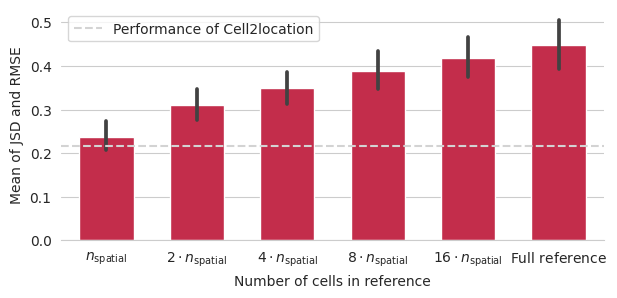

In [38]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 3))
sns.barplot(data=test.query("method=='tangram'"), x="type", y="jsd_rmse", ax=ax, color="crimson", width=0.6)
sns.despine(left=True)
latex_labels = [
    r"$n_{\text{spatial}}$",
    r"$2\cdot n_{\text{spatial}}$",
    r"$4\cdot n_{\text{spatial}}$",
    r"$8\cdot n_{\text{spatial}}$",
    r"$16\cdot n_{\text{spatial}}$",
    r"$\text{Full reference}$",
]
ax.set_xticklabels(latex_labels)
ax.set_xlabel("Number of cells in reference")
ax.set_ylabel("Mean of JSD and RMSE")
ax.axhline(
    test.groupby(["type", "method"]).jsd_rmse.mean().min(),
    color="lightgrey",
    linestyle="--",
    label="Performance of Cell2location",
)
ax.legend()
fig.savefig("figures/Figure2/tangram_rmse_jsd.png", bbox_inches="tight", dpi=300)

## Plot differences between homogenous and heterogeneous

In [39]:
test["n_cell_types"] = test["dataset"].map(
    {
        "Brain_1": "homogeneous",
        "Brain_2": "heterogeneous",
        "Brain_3": "heterogeneous",
        "Brain_4": "homogeneous",
        "Heart_1": "homogeneous",
        "Heart_2": "heterogeneous",
        "Heart_3": "heterogeneous",
        "Heart_4": "homogeneous",
    }
)

/tmp/ipykernel_373661/1974409705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["n_cell_types"] = test["dataset"].map(


In [43]:
test.query("type == 'no draw'")

,path,method,modality,dataset_features,dataset,features,mdata_spatial_path,jsd,rmse,type,power,jsd_rmse,n_cell_types
0,/vol/storage/data/deconvolution_results/test2/...,tangram,atac,Heart_3_highly_accessible,Heart_3,highly_accessible,/vol/storage/data/simulations/test/Heart_3.h5mu,0.326849,0.068327,no draw,NaN,0.197588,heterogeneous
1,/vol/storage/data/deconvolution_results/test2/...,tangram,atac,Heart_1_highly_accessible,Heart_1,highly_accessible,/vol/storage/data/simulations/test/Heart_1.h5mu,0.442848,0.179567,no draw,NaN,0.311208,homogeneous
2,/vol/storage/data/deconvolution_results/test2/...,tangram,atac,Heart_4_highly_variable,Heart_4,highly_variable,/vol/storage/data/simulations/test/Heart_4.h5mu,0.401321,0.096223,no draw,NaN,0.248772,homogeneous
3,/vol/storage/data/deconvolution_results/test2/...,tangram,atac,Heart_2_highly_accessible,Heart_2,highly_accessible,/vol/storage/data/simulations/test/Heart_2.h5mu,0.327318,0.061107,no draw,NaN,0.194212,heterogeneous
4,/vol/storage/data/deconvolution_results/test2/...,tangram,atac,Heart_3_highly_variable,Heart_3,highly_variable,/vol/storage/data/simulations/test/Heart_3.h5mu,0.325744,0.065920,no draw,NaN,0.195832,heterogeneous
5,/vol/storage/data/deconvolution_results/test2/...,tangram,atac,Heart_4_highly_accessible,Heart_4,highly_accessible,/vol/storage/data/simulations/test/Heart_4.h5mu,0.392247,0.097618,no draw,NaN,0.244932,homogeneous
6,/vol/storage/data/deconvolution_results/test2/...,tangram,atac,Heart_2_highly_variable,Heart_2,highly_variable,/vol/storage/data/simulations/test/Heart_2.h5mu,0.328696,0.061222,no draw,NaN,0.194959,heterogeneous
7,/vol/storage/data/deconvolution_results/test2/...,tangram,atac,Heart_1_highly_variable,Heart_1,highly_variable,/vol/storage/data/simulations/test/Heart_1.h5mu,0.442179,0.179595,no draw,NaN,0.310887,homogeneous


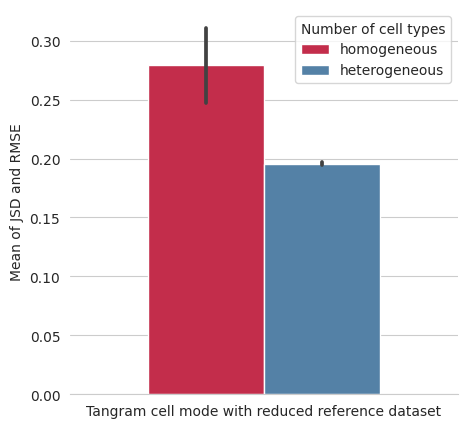

In [49]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    data=test.query("type == 'no draw'"),
    x="method",
    y="jsd_rmse",
    hue="n_cell_types",
    palette=["crimson", "steelblue"],
    ax=ax,
    hue_order=["homogeneous", "heterogeneous"],
    width=0.6,
)
sns.despine(left=True)
ax.set_ylabel("Mean of JSD and RMSE")
ax.set_xlabel("")
ax.set_xticklabels(["Tangram cell mode with reduced reference dataset"])
# move legend outside
plt.legend(title="Number of cell types", loc="upper right")